<a href="https://colab.research.google.com/github/zihadul-haque/ML/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Create an Deep Learning Model




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Mothly Charges are float datatypes but Total charges are object ,that should be converted

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()
#errors='coerce' for ignore the error

11

In [ ]:
# null value containing data
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.shape

(7043, 20)

Remove rows with space in TotalCharge  

In [ ]:
df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [ ]:
df.shape

(7043, 20)

In [ ]:

df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
df1[df1.Churn=='No'].shape

(5163, 20)

In [ ]:
df1.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

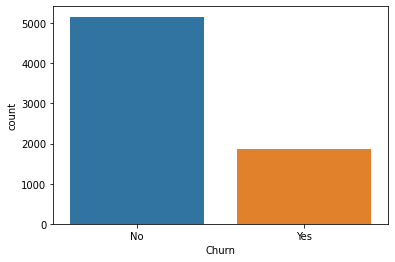

In [ ]:
sns.countplot(x='Churn',data=df1)


In [ ]:
# This is a imbalance Datasets


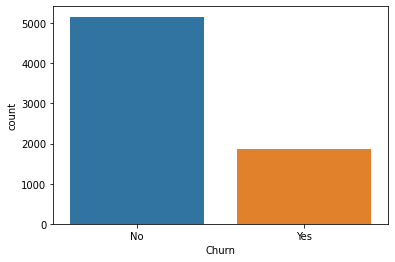

In [ ]:
sns.countplot(x='Churn' ,data=df1)

In [ ]:
df1[df1.Churn == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

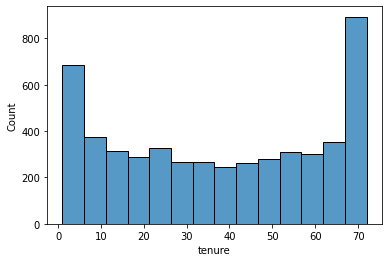

In [ ]:
sns.histplot(df1[df1.Churn == 'No'].tenure)

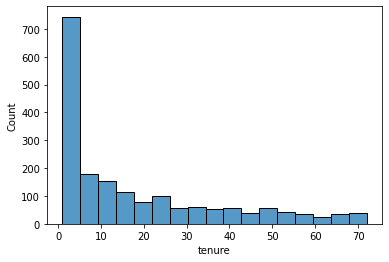

In [ ]:
sns.histplot(df1[df1.Churn == 'Yes'].tenure)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


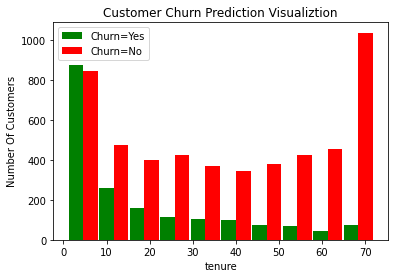

In [ ]:
tenure_churn_no=df1[df1.Churn == 'No'].tenure
tenure_churn_yes=df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
tenure_churn_no.shape

(5163,)

(array([[0., 3., 3., 1., 0., 2., 0., 1., 1., 2.],
        [2., 1., 3., 2., 0., 1., 2., 1., 0., 1.]]),
 array([ 67. ,  75.3,  83.6,  91.9, 100.2, 108.5, 116.8, 125.1, 133.4,
        141.7, 150. ]),
 <a list of 2 Lists of Patches objects>)

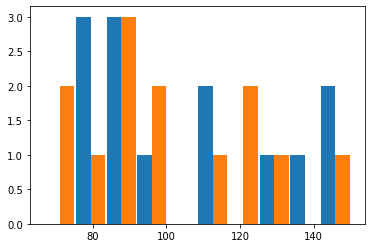

In [ ]:
plt.hist([blood_sugar_men,blood_sugar_women] , rwidth=0.95)

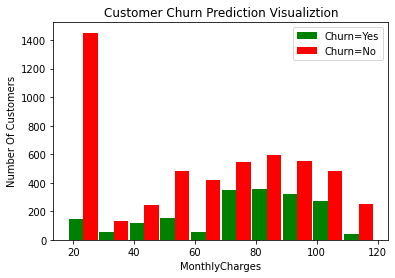

In [ ]:
mc_churn_no=df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

# Data Cleanig

In [ ]:
for column in df:
  print(f'{column}:{df[column].unique()}')


gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:['29.85' '1889

In [ ]:
#idenfies uniques values columns
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


## some the value are no internet service or no phone service ,this replace 

1.   List item
2.   List item

by simple no

In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
df1.Partner.unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
obj_col=[col for col in df1.columns if df1[col].dtypes=='object']
obj_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
                'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
yes_no_columns

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'Churn']

In [ ]:
for col in yes_no_columns:
  df1.replace({'Yes':1,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 0]
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df1['gender'].replace({"Female":1,"Male":0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## One hot encoding for categorical variables

In [ ]:
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.shape

(7032, 27)

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1667,0,0,0,0,14,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
6249,0,0,0,0,3,1,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
5926,0,0,0,0,6,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
2740,1,0,0,0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1685,0,1,1,0,27,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
df2.info()

    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [ ]:
col_to_scal=['tenure','MonthlyCharges','TotalCharges']
df2[col_to_scal]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
col_to_scal=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[col_to_scal]=scaler.fit_transform(df2[col_to_scal])

In [ ]:
df2[col_to_scal]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


In [ ]:
## Train Test split
X=df2.drop('Churn',axis=1)
y=df2['Churn']

from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=.2,random_state=5)

In [ ]:
Xtrain.shape

(5625, 26)

In [ ]:
Xtrain[5:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3607,1,0,0,0,0.169014,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
# Create ANN 
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU,ReLU
from keras.layers import Dropout

In [ ]:
model=Sequential([Dense(26,activation='relu'),Dense(15,activation='relu'),Dense(1,activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.7719
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7934
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7973
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8007
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8092
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4052 - accura

In [ ]:
model.evaluate(Xtest,ytest)

44/44 [==============================] - 0s 2ms/step - loss: 0.5009 - accuracy: 0.7640


[0.5009292364120483, 0.7640369534492493]

In [ ]:
y_pred=model.predict(Xtest)
y_pred

array([[0.18636215],
       [0.47848257],
       [0.00202638],
       ...,
       [0.6670685 ],
       [0.6849015 ],
       [0.6409055 ]], dtype=float32)

In [ ]:
ytest[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [ ]:
prediction=[]
for element in y_pred:
  if element>=.5:
    prediction.append(1)
  else:
    prediction.append(0)


In [ ]:
prediction[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(ytest,prediction))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       999
           1       0.62      0.47      0.54       408

    accuracy                           0.76      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407



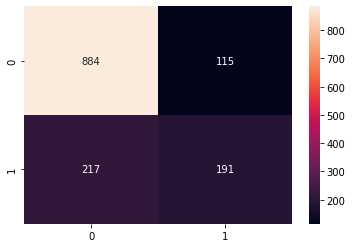

In [ ]:
cm=confusion_matrix(ytest,prediction)
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
cm

array([[884, 115],
       [217, 191]])

Text(69.0, 0.5, 'Truth')

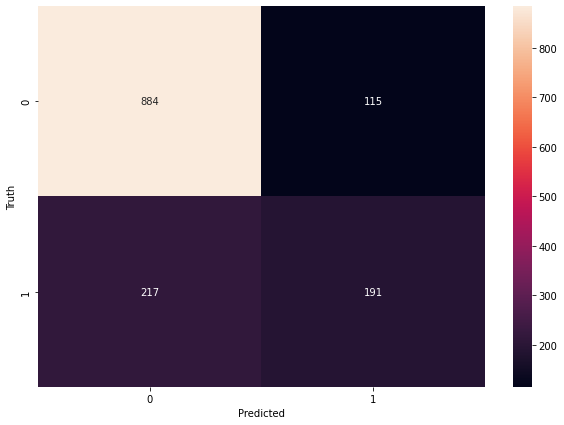

In [ ]:
cm_tf = tf.math.confusion_matrix(labels=ytest,predictions=prediction)

plt.figure(figsize = (10,7))
sns.heatmap(cm_tf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Handle Imbalance Datasets

In [ ]:
## create a function for ANN model creation and results
def ANN(Xtrain,Xtest,ytrain,ytest,loss,weights):
  model=Sequential([
                    Dense(26,activation="relu"),
                    Dense(15,activation='relu'),
                    Dense(1,activation='sigmoid')
  ])
  model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
  if weights == -1:
    model.fit(Xtrain,ytrain,epochs=100)
  else:
    model.fit(Xtrain,ytrain,epochs=100,class_weight=weights)
  print(model.evaluate(Xtest,ytest))
  y_preds=np.round(model.predict(Xtest))
  print("Classification Report: \n",classification_report(ytest,y_preds))
  return y_preds

In [ ]:
y_preds =ANN(Xtrain,Xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4634 - accuracy: 0.7685
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.7932
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4177 - accuracy: 0.8023
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8030
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4101 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8046
Epoch 7/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8064
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4045 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8133
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4001 - accura

In [ ]:
ytrain.value_counts()

0    4164
1    1461
Name: Churn, dtype: int64

In [ ]:
#class count
count_class_0,count_class_1=df2.Churn.value_counts()
#Divide by class
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
#Under sampling
df_class_0_under =df_class_0.sample(count_class_1)

#concat two datasets
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random under sampling:')
print(df_test_under.Churn.value_counts())

Random under sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
X=df_test_under.drop('Churn',axis=1)
y=df_test_under.Churn

X_train,X_test,y_train,y_test=tts(X,y,test_size=.2,random_state=5,stratify=y)

In [ ]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [ ]:
y_preds =ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 0.6070 - accuracy: 0.6799
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5216 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5019 - accuracy: 0.7642
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4941 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4889 - accuracy: 0.7666
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4863 - accuracy: 0.7722
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4808 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7686
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4773 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4747 - accuracy: 0.7763
Epoch 11/

# Method 2:Oversampling

In [ ]:
count_class_0,count_class_1

(5163, 1869)

In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_test_over= pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape 

(10326, 27)

In [ ]:
#train,test split
X=df_test_over.drop('Churn',axis=1)
y=df_test_over.Churn
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=.2,random_state=6,stratify=y)


In [ ]:
y_preds =ANN(Xtrain,Xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5417 - accuracy: 0.7345
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4901 - accuracy: 0.7623
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4833 - accuracy: 0.7663
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4787 - accuracy: 0.7702
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4750 - accuracy: 0.7701
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4727 - accuracy: 0.7715
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4697 - accuracy: 0.7741
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4675 - accuracy: 0.7753
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4644 - accuracy: 0.7772
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4625 - accura

## Method: SMOTE

In [ ]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
X=df2.drop('Churn',axis=1)
y=df2.Churn


In [ ]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=5,sampling_strategy='minority')
X_sm,y_sm=smote.fit_resample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=.2,random_state=6,stratify=y)

In [ ]:
y_preds =ANN(Xtrain,Xtest,ytrain,ytest,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.5030 - accuracy: 0.7577
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4271 - accuracy: 0.7972
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4199 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4178 - accuracy: 0.7993
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8059
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8059
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8062
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4100 - accuracy: 0.8066
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4084 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4074 - accura

In [ ]:
Xtrain,Xtest,ytrain,ytest=tts(X_sm,y_sm,test_size=.2,random_state=6,stratify=y)
y_preds =ANN(Xtrain,Xtest,ytrain,ytest,'binary_crossentropy',-1)

ValueError: ignored